In [1]:
import jieba
import csv
import wordcloud
import matplotlib.pyplot as plt

In [2]:
with open('lfq_csv.csv','r',encoding='utf-8') as f:
    reader=csv.reader(f)
    content=[row[1]for row in reader][1:]

In [3]:
len(content)

71

In [4]:
content

['复习期末的这几天，我从钻五到了钻一。 \xa0',
 '转发理由:恭喜@-席瑾- 1名用户获得【1k】。微博官方唯一抽奖工具@微博抽奖平台 对本次抽奖进行监督，结果公正有效。公示链接：微博抽奖平台 //@_老番茄_:庆祝吃鸡，转发抽1k！明天20点开奖！ 查看图片\xa0\xa0',
 '转发理由:庆祝吃鸡，转发抽1k！明天20点开奖！ 查看图片\xa0\xa0',
 '又到了一年两度，万众期待的考前临时抱佛脚时间 \xa0',
 '默契挑战！看看我和BOY谁才是真正的好兄弟#YSL212#  _老番茄_的微博视频 \xa0',
 '生日快乐，我的偶像 _老番茄_的微博视频 \xa0',
 '儿童节快乐！希望我的脸能变回小时候那么圆润！ \xa0原图\xa0',
 '失去梦想变成大鸡腿 \xa0原图\xa0',
 '决定利用每天上课开小差的时间学一点蒙语。如果下次回内蒙能看懂蒙文了，说明我这学期一定开了很多小差。 \xa0原图\xa0',
 '为什么b站在我要交作业之前上线柯南剧场版。可恶，已经看了一天柯南了。 \xa0',
 '昨晚失眠睡不着，翻来覆去。四点钟的时候，突然悟到，好像是热得睡不着。于是毅然打开了空调，立马睡着了。 \xa0',
 '转发理由:给我的好弟弟打call 查看图片 //@最强大脑陆英泽:#最强大脑开播##最强大脑#还有半小时就要开播拉，看不了电视的也可以访问http://t.cn/heFOA收看网络直播\xa0\xa0',
 '完美还原世界名画！你说我画挑战。天猫搜索OPPO官方旗舰店get同款耳机  _老番茄_的微博视频 \xa0',
 '藏在黑影中的小怪兽 _老番茄_的微博视频 \xa0',
 '感谢@腾讯NintendoSwitch 送的国行switch和李维斯联名小夹克儿！耀西真可爱 \xa0[组图共3张]\xa0原图\xa0',
 '打算做视频之前休息一会→看一眼直播→看到有人在玩奥特曼游戏→勾起回忆→看了一整晚的奥特曼 \xa0',
 '如何让脸看上去不那么长：强行遮住下巴 \xa0原图\xa0',
 '分享图片 \xa0原图\xa0',
 '第一次网课考试，真是有趣的体验。每当抓耳挠腮做不出来的时候，切到会议室，发现同学们也在抓耳挠腮，我就放心了。 \xa0',
 '还有一天就考试了！开启临时抱佛脚模式！ \xa0',
 

In [5]:
stopwords_list = [k.strip() for k in open('stopwords.txt', encoding='utf8').readlines() if k.strip() != '\n']

In [6]:
len(stopwords_list)

1893

In [7]:
def stopwords_append(s,stopwords_list):
    if s not in stopwords_list:
        stopwords_list.append(s)

In [8]:
stopwords_append('置顶',stopwords_list)
stopwords_append('转发理由',stopwords_list)
stopwords_append('转发',stopwords_list)
stopwords_append('理由',stopwords_list)
stopwords_append('明星动态',stopwords_list)
stopwords_append('微博视频',stopwords_list)
stopwords_append('原图',stopwords_list)
stopwords_append('易',stopwords_list)
stopwords_append('烊',stopwords_list)
stopwords_append('千玺',stopwords_list)
stopwords_append(' ',stopwords_list)
stopwords_append('\xa0',stopwords_list)
stopwords_append('组图',stopwords_list)
stopwords_append('张',stopwords_list)
stopwords_append('',stopwords_list)
stopwords_append('视频',stopwords_list)
stopwords_append('http',stopwords_list)
stopwords_append('cn',stopwords_list)
stopwords_append('微博',stopwords_list)
stopwords_append('番茄',stopwords_list)
stopwords_append('图片',stopwords_list)

In [9]:
txt=' '.join(content)

In [10]:
txt

'复习期末的这几天，我从钻五到了钻一。 \xa0 转发理由:恭喜@-席瑾- 1名用户获得【1k】。微博官方唯一抽奖工具@微博抽奖平台 对本次抽奖进行监督，结果公正有效。公示链接：微博抽奖平台 //@_老番茄_:庆祝吃鸡，转发抽1k！明天20点开奖！ 查看图片\xa0\xa0 转发理由:庆祝吃鸡，转发抽1k！明天20点开奖！ 查看图片\xa0\xa0 又到了一年两度，万众期待的考前临时抱佛脚时间 \xa0 默契挑战！看看我和BOY谁才是真正的好兄弟#YSL212#  _老番茄_的微博视频 \xa0 生日快乐，我的偶像 _老番茄_的微博视频 \xa0 儿童节快乐！希望我的脸能变回小时候那么圆润！ \xa0原图\xa0 失去梦想变成大鸡腿 \xa0原图\xa0 决定利用每天上课开小差的时间学一点蒙语。如果下次回内蒙能看懂蒙文了，说明我这学期一定开了很多小差。 \xa0原图\xa0 为什么b站在我要交作业之前上线柯南剧场版。可恶，已经看了一天柯南了。 \xa0 昨晚失眠睡不着，翻来覆去。四点钟的时候，突然悟到，好像是热得睡不着。于是毅然打开了空调，立马睡着了。 \xa0 转发理由:给我的好弟弟打call 查看图片 //@最强大脑陆英泽:#最强大脑开播##最强大脑#还有半小时就要开播拉，看不了电视的也可以访问http://t.cn/heFOA收看网络直播\xa0\xa0 完美还原世界名画！你说我画挑战。天猫搜索OPPO官方旗舰店get同款耳机  _老番茄_的微博视频 \xa0 藏在黑影中的小怪兽 _老番茄_的微博视频 \xa0 感谢@腾讯NintendoSwitch 送的国行switch和李维斯联名小夹克儿！耀西真可爱 \xa0[组图共3张]\xa0原图\xa0 打算做视频之前休息一会→看一眼直播→看到有人在玩奥特曼游戏→勾起回忆→看了一整晚的奥特曼 \xa0 如何让脸看上去不那么长：强行遮住下巴 \xa0原图\xa0 分享图片 \xa0原图\xa0 第一次网课考试，真是有趣的体验。每当抓耳挠腮做不出来的时候，切到会议室，发现同学们也在抓耳挠腮，我就放心了。 \xa0 还有一天就考试了！开启临时抱佛脚模式！ \xa0 #世界读书日# 推荐一下《围城》吧，特有意思。高中看的，大学时出门还经常揣着在飞机上重温（虽然最后都睡着了） \xa0 “猫” \xa0原图\xa0 最近不知道

In [11]:
word_list=jieba.lcut(txt)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ESTELL~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.733 seconds.
Prefix dict has been built successfully.


In [12]:
word_list

['复习',
 '期末',
 '的',
 '这',
 '几天',
 '，',
 '我',
 '从',
 '钻五到',
 '了',
 '钻',
 '一',
 '。',
 ' ',
 '\xa0',
 ' ',
 '转发',
 '理由',
 ':',
 '恭喜',
 '@',
 '-',
 '席瑾',
 '-',
 ' ',
 '1',
 '名',
 '用户',
 '获得',
 '【',
 '1k',
 '】',
 '。',
 '微博',
 '官方',
 '唯一',
 '抽奖',
 '工具',
 '@',
 '微博',
 '抽奖',
 '平台',
 ' ',
 '对',
 '本次',
 '抽奖',
 '进行',
 '监督',
 '，',
 '结果',
 '公正',
 '有效',
 '。',
 '公示',
 '链接',
 '：',
 '微博',
 '抽奖',
 '平台',
 ' ',
 '/',
 '/',
 '@',
 '_',
 '老',
 '番茄',
 '_',
 ':',
 '庆祝',
 '吃',
 '鸡',
 '，',
 '转发',
 '抽',
 '1k',
 '！',
 '明天',
 '20',
 '点',
 '开奖',
 '！',
 ' ',
 '查看',
 '图片',
 '\xa0',
 '\xa0',
 ' ',
 '转发',
 '理由',
 ':',
 '庆祝',
 '吃',
 '鸡',
 '，',
 '转发',
 '抽',
 '1k',
 '！',
 '明天',
 '20',
 '点',
 '开奖',
 '！',
 ' ',
 '查看',
 '图片',
 '\xa0',
 '\xa0',
 ' ',
 '又',
 '到',
 '了',
 '一年',
 '两度',
 '，',
 '万众',
 '期待',
 '的',
 '考前',
 '临时',
 '抱佛脚',
 '时间',
 ' ',
 '\xa0',
 ' ',
 '默契',
 '挑战',
 '！',
 '看看',
 '我',
 '和',
 'BOY',
 '谁',
 '才',
 '是',
 '真正',
 '的',
 '好',
 '兄弟',
 '#',
 'YSL212',
 '#',
 ' ',
 ' ',
 '_',
 '老',
 '番茄',
 '_',
 '的',
 '微博',
 '视频',
 

In [14]:
word_list=[i for i in word_list if i not in stopwords_list]

In [15]:
word_list

['复习',
 '期末',
 '几天',
 '钻五到',
 '钻',
 '恭喜',
 '席瑾',
 '名',
 '用户',
 '1k',
 '官方',
 '唯一',
 '抽奖',
 '工具',
 '抽奖',
 '平台',
 '本次',
 '抽奖',
 '监督',
 '公正',
 '公示',
 '链接',
 '抽奖',
 '平台',
 '庆祝',
 '吃',
 '鸡',
 '抽',
 '1k',
 '明天',
 '20',
 '点',
 '开奖',
 '查看',
 '庆祝',
 '吃',
 '鸡',
 '抽',
 '1k',
 '明天',
 '20',
 '点',
 '开奖',
 '查看',
 '一年',
 '两度',
 '万众',
 '期待',
 '考前',
 '临时',
 '抱佛脚',
 '时间',
 '默契',
 '挑战',
 'BOY',
 '兄弟',
 'YSL212',
 '生日快乐',
 '偶像',
 '儿童节',
 '快乐',
 '希望',
 '脸能',
 '变回',
 '小时候',
 '圆润',
 '梦想',
 '鸡腿',
 '利用',
 '上课',
 '开小差',
 '时间',
 '学',
 '一点',
 '蒙语',
 '下次',
 '回',
 '内蒙',
 '能看懂',
 '蒙文',
 '学期',
 '开',
 '小差',
 'b',
 '站',
 '交',
 '作业',
 '上线',
 '柯南',
 '剧场版',
 '可恶',
 '柯南',
 '昨晚',
 '失眠',
 '睡不着',
 '翻来覆去',
 '四点',
 '钟',
 '悟',
 '好像',
 '热得',
 '睡不着',
 '毅然',
 '打开',
 '空调',
 '睡着',
 '弟弟',
 'call',
 '查看',
 '最强',
 '大脑',
 '陆英泽',
 '最强',
 '大脑',
 '开播',
 '##',
 '最强',
 '大脑',
 '半小时',
 '开播',
 '拉',
 '电视',
 '访问',
 't',
 'heFOA',
 '收看',
 '网络',
 '直播',
 '完美',
 '还原',
 '世界',
 '名画',
 '说',
 '画',
 '挑战',
 '天猫',
 '搜索',
 'OPPO',
 '官方',
 '旗舰店',
 'get',
 '同款',

In [16]:
len(word_list)

515

In [17]:
c={}

In [18]:
for x in word_list:
    if len(x) > 1  and x != '\r\n' and x != ' ':
        if(x not in c):
            c[x] = 1
        else:
            c[x] += 1
items = sorted(c.items(), key=lambda item: item[1], reverse=True)

In [19]:
items

[('明天', 5),
 ('抽奖', 4),
 ('作业', 4),
 ('百大', 4),
 ('哔哩', 4),
 ('UP', 4),
 ('加油', 4),
 ('期末', 3),
 ('1k', 3),
 ('查看', 3),
 ('时间', 3),
 ('上课', 3),
 ('学期', 3),
 ('睡不着', 3),
 ('最强', 3),
 ('大脑', 3),
 ('头发', 3),
 ('黄瓜', 3),
 ('排面', 3),
 ('财大', 3),
 ('哈哈哈哈', 3),
 ('官方', 2),
 ('平台', 2),
 ('庆祝', 2),
 ('20', 2),
 ('开奖', 2),
 ('期待', 2),
 ('临时', 2),
 ('抱佛脚', 2),
 ('挑战', 2),
 ('柯南', 2),
 ('失眠', 2),
 ('睡着', 2),
 ('开播', 2),
 ('直播', 2),
 ('世界', 2),
 ('奥特曼', 2),
 ('分享', 2),
 ('考试', 2),
 ('抓耳挠腮', 2),
 ('明明', 2),
 ('上学', 2),
 ('这周', 2),
 ('好好', 2),
 ('天天', 2),
 ('晚睡', 2),
 ('上网', 2),
 ('晚上', 2),
 ('润唇膏', 2),
 ('更新', 2),
 ('新年快乐', 2),
 ('上海财经大学', 2),
 ('智能', 2),
 ('揭晓', 2),
 ('喜欢', 2),
 ('谢谢', 2),
 ('不高', 2),
 ('复习', 1),
 ('几天', 1),
 ('钻五到', 1),
 ('恭喜', 1),
 ('席瑾', 1),
 ('用户', 1),
 ('唯一', 1),
 ('工具', 1),
 ('本次', 1),
 ('监督', 1),
 ('公正', 1),
 ('公示', 1),
 ('链接', 1),
 ('一年', 1),
 ('两度', 1),
 ('万众', 1),
 ('考前', 1),
 ('默契', 1),
 ('BOY', 1),
 ('兄弟', 1),
 ('YSL212', 1),
 ('生日快乐', 1),
 ('偶像', 1),
 ('儿童节', 1),
 ('快乐

with open('cipin_lfq.txt','a',encoding='utf-8') as f:
    for i in items:
        f.write(i[0]+'  '+str(i[1])+'\n')

In [20]:
text = ' '.join(word_list)

In [21]:
def word_cloud(text):
    wc = wordcloud.WordCloud(background_color='white',
                             width=1000,
                             height=600,
                             font_path='Consolas-with-Yahei Nerd Font.ttf')
    cloud = wc.generate(text)
    plt.imshow(wc)
    plt.axis('off')
    plt.show()
    return wc

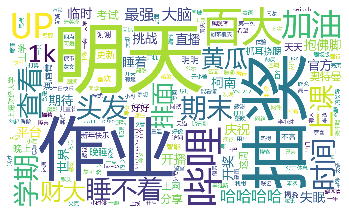

In [22]:
word_cloud(text).to_file('yyqx_wordcloud.jpg')